# STAT 301: Assignment 4
# <font color=green> Computational Code and Output

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(dplyr)
library(gridExtra)
library(tidymodels)
library(digest)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(caret)
library(boot)
library(pROC)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

In [2]:
heart_failure_records <- read_csv("data/heart_failure_clinical_records_dataset.csv")

head(heart_failure_records)

# Fixed datatypes for columns
heart_failures <- heart_failure_records %>%
                    mutate(age = as.integer(age),
                            anaemia = as.factor(anaemia),
                            creatinine_phosphokinase = as.integer(creatinine_phosphokinase),
                            diabetes = as.factor(diabetes),
                            ejection_fraction = as.integer(ejection_fraction),
                            high_blood_pressure = as.factor(high_blood_pressure),
                            serum_sodium = as.integer(serum_sodium),
                            sex = as.factor(sex),
                            smoking = as.factor(smoking),
                            time = as.integer(time),
                            DEATH_EVENT = as.factor(DEATH_EVENT))

# added ID column
heart_failures <- heart_failures %>%
  mutate(ID = seq_along(age))
                               
tail(heart_failures)

# Checking for missing values in rows (TRUE if no missing value)
nrow(heart_failure_records) == nrow(na.omit(heart_failure_records))

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age anaemia creatinine_phosphokinase diabetes ejection_fraction
1 75  0        582                     0        20               
2 55  0       7861                     0        38               
3 65  0        146                     0        20               
4 50  1        111                     0        20               
5 65  1        160                     1        20               
6 90  1         47                     0        40               
  high_blood_pressure platelets serum_creatinine serum_sodium sex smoking time
1 1                   265000    1.9              130          1   0       4   
2 0                   263358    1.1              136          1   0       6   
3 0                   162000    1.3              129          1   1       7   
4 0                   210000    1.9              137          1   0       7   
5 0                   327000    2.7              116          0   0       8   
6 1                   204000    2.1              132          1   1       8   
  DEATH_EVENT
1 1          
2 1          
3 1          
4 1          
5 1          
6 1

age anaemia creatinine_phosphokinase diabetes ejection_fraction
1 63  1        103                     1        35               
2 62  0         61                     1        38               
3 55  0       1820                     0        38               
4 45  0       2060                     1        60               
5 45  0       2413                     0        38               
6 50  0        196                     0        45               
  high_blood_pressure platelets serum_creatinine serum_sodium sex smoking time
1 0                   179000    0.9              136          1   1       270 
2 1                   155000    1.1              143          1   1       270 
3 0                   270000    1.2              139          0   0       271 
4 0                   742000    0.8              138          0   0       278 
5 0                   140000    1.4              140          1   1       280 
6 0                   395000    1.6              136          1   1       285 
  DEATH_EVENT ID 
1 0           294
2 0           295
3 0           296
4 0           297
5 0           298
6 0           299

[1] TRUE

## Data

#### [Heart failure clinical records](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records) : Obtained from the UC Irvine Machine Learning Respository.<br>
##### Based on the study : [Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) <br>

The dataset contains medical records of 299 heart failure patients during their follow-up period. Each patient's profile was recorded with 13 following features with their original datatypes:
- age (in years): age of the patient.
    - Type: Integer.
- anaemia: decrease of red blood cells or hemoglobin.
    - Type: binary.
- creatinine_phosphokinase (in mcg/L): level of the CPK enzyme in the blood.
    - Type: Integer.
- diabetes: if the patient has diabetes.
    - Type: Binary.
- ejection_fraction (in %) : percentage of blood leaving the heart at each contraction.
    - Type: Integer.
- high_blood_pressure: if the patient has hypertension.
    - Type: Binary.
- platelets (in kiloplatelets/mL): platelets in the blood.
    - Type: Continuous.
- serum_creatinine (in mg/dL): level of serum creatinine in the blood.
    - Type: Continuous.
- serum_sodium (in mEq/L): level of serum sodium in the blood.
    - Type: Integer.
- sex: woman or man.
    - Type: Binary.
- smoking: if the patient smokes or not.
    - Type: Binary.
- time (in days): follow-up period.
    - Type: Integer.
- death_event: if the patient died during the follow-up period.
    - Type: Binary.

Number of observations = 299. Number of variables = 13.<br>
There are no missing values in any of the rows or the features.

The dataset was collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan) in April-Decemeber 2015. The dataset contained records of 105 women patients and 194 men patients with their ages ranging between 40-95. The data was collected using Purposive sampling (data was specifically collected to analyze death events for heart-failure patients).

## Question

- Response Variable: death_event.

Are there specific clinical features that are significantly associated with higher death events in heart failure patients, and based on these features can we create a predictive model to accurately identify patients with a death-event? <br>

The question is based on both inference and prediciton.
- Inference: The first part of the question asks about whether there is significant association between explanatory variables and death_event.
- Prediction: The second part of the question asks whether we can use these features to predict death-events for heart failure patients.

How the data can helps us address the question of interest:
- We can explore associations between the features to determine which features to use as explanatory variables. Additionally, this exploration can help us identify potential confounding variables, allowing us to decide whether to include them in the model.
- We can look at the estimates from the fitted regresssion and look at their standard errors and p-values to decide whether to include them or not based on their significance.
- We can split the data into training and testing set to see how well our predictive models perform. We can also use cross-validation to select any necessary hyper-parameters.

## Visualization

### 1. GGpairs
 - GGpairs can help us look at correlation between non-categorical input variables. Due to presence of many input variables we can use ggpairs to interpret correlation instead of looking at individual scatterplots for each variable.
 - We might need to consider removing highly correlated variables to have avoid multicollinearity.
 - Response variable is also included in the plot to look at boxplots between inputs and response (to help us to see correlation between them).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


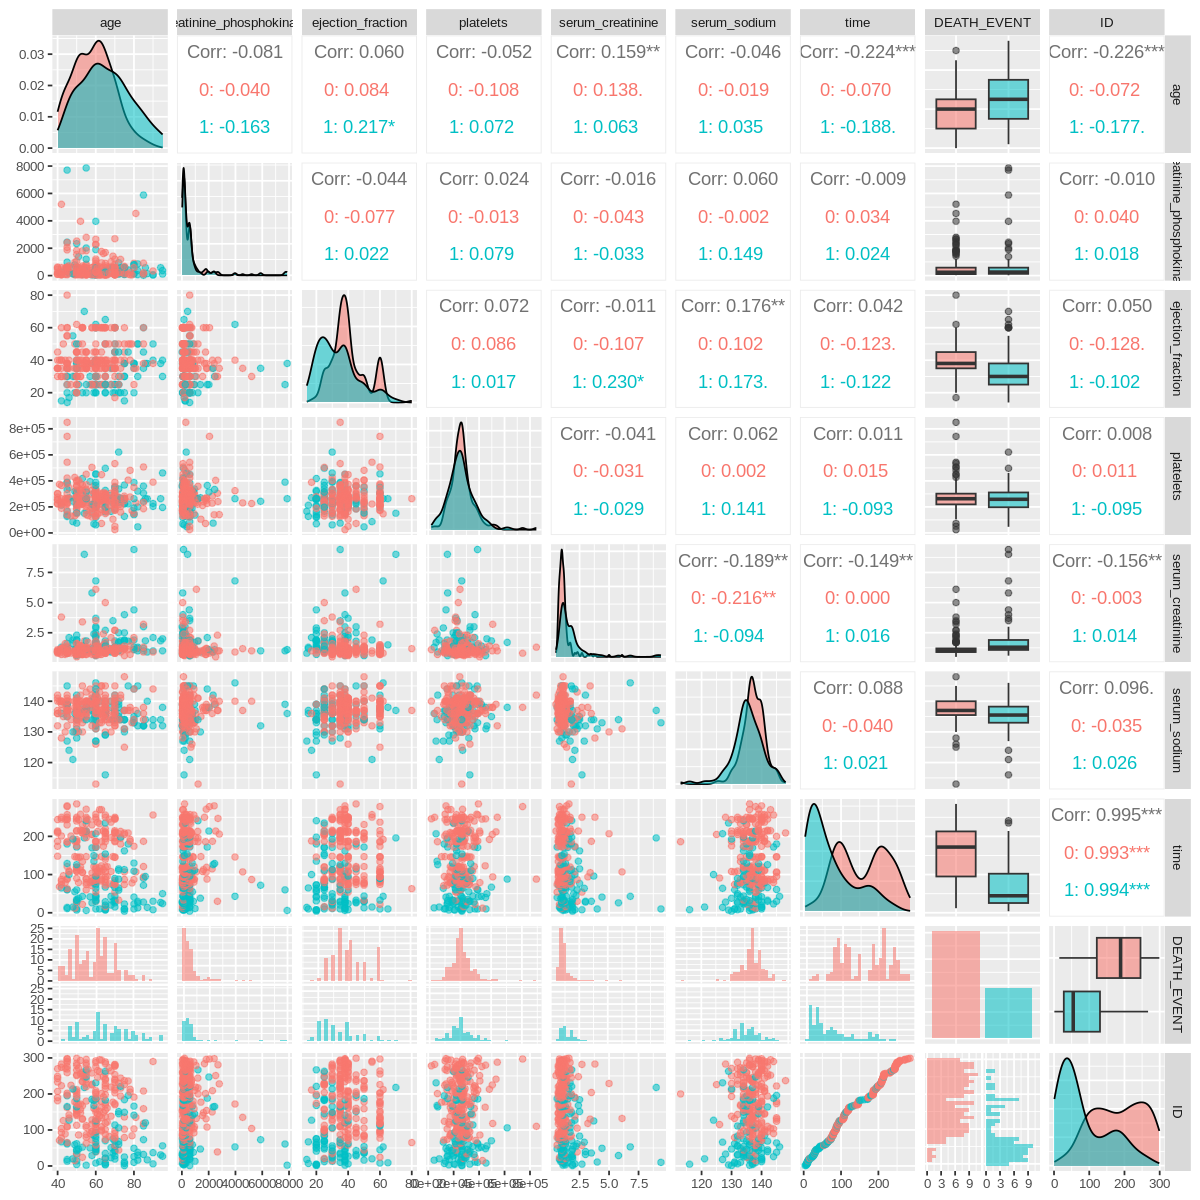

In [3]:
options(repr.plot.width=10, repr.plot.height=10)

# Categorical variables removed to look at correlation
heart_failures %>%
  select(- anaemia, - diabetes, -high_blood_pressure, -sex, -smoking) %>% 
  ggpairs(progress = FALSE, aes(color = DEATH_EVENT,
            alpha = 0.5)) +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

#### GGpair Reasoning

- Upon examining the correlations in the dataset, several pairs of input variables exhibit slight correlations. Notable correlations include serum_creatinine and age, time and age, serum_sodium and ejection_fraction, serum_creatinine and serum_sodium, as well as serum_creatinine and time. While these correlations are mild, it's important to look at the potential for multicollinearity issues when including these variables together in the model. Therefore, further analysis is needed to determine whether these variables should be kept or removed from the model.

 - Additionally, a comprehensive analysis of boxplots depicting the relationship between input variables and the response variable (DEATH_EVENT) reveals interesting insights. Significant disparities in different levels of DEATH_EVENT can be visually identified for age, ejection_fraction, serum_creatinine and time. This observation suggests a correlation between higher death events and specific patterns of these input variables. These are examined in more detail in the subsequent boxplot graphs. Understanding these associations is crucial for gaining deeper insights into the dataset to generate a better model.
 
- Looking at the plots on the diagonal we can see distribution of various input variables and also death_event. We can see that death_event (response variable) has class imbalance where we have more patients without death_events in the dataset. This imbalance can decrease performance of our model and lead to unexpected results. It might be useful to look into sampling techniques that can reduce the imbalance between levels of death_events.
    - Note: Sampling techniques like oversampling or undersampling can come with disadvantages as well. Therefore, a proper further analysis is needed.

### 2. Boxplots
Can help us determine which variables might be correlated with the response variable (DEATH_EVENT).
- Only inputs with possible disparities for different levels of DEATH_EVENT are visuallized below. Boxplots for other input variables didn't display significant visual differences.
- Note: Response Variable is plotted on the x-axis to enhance visual clarity of the boxplots.

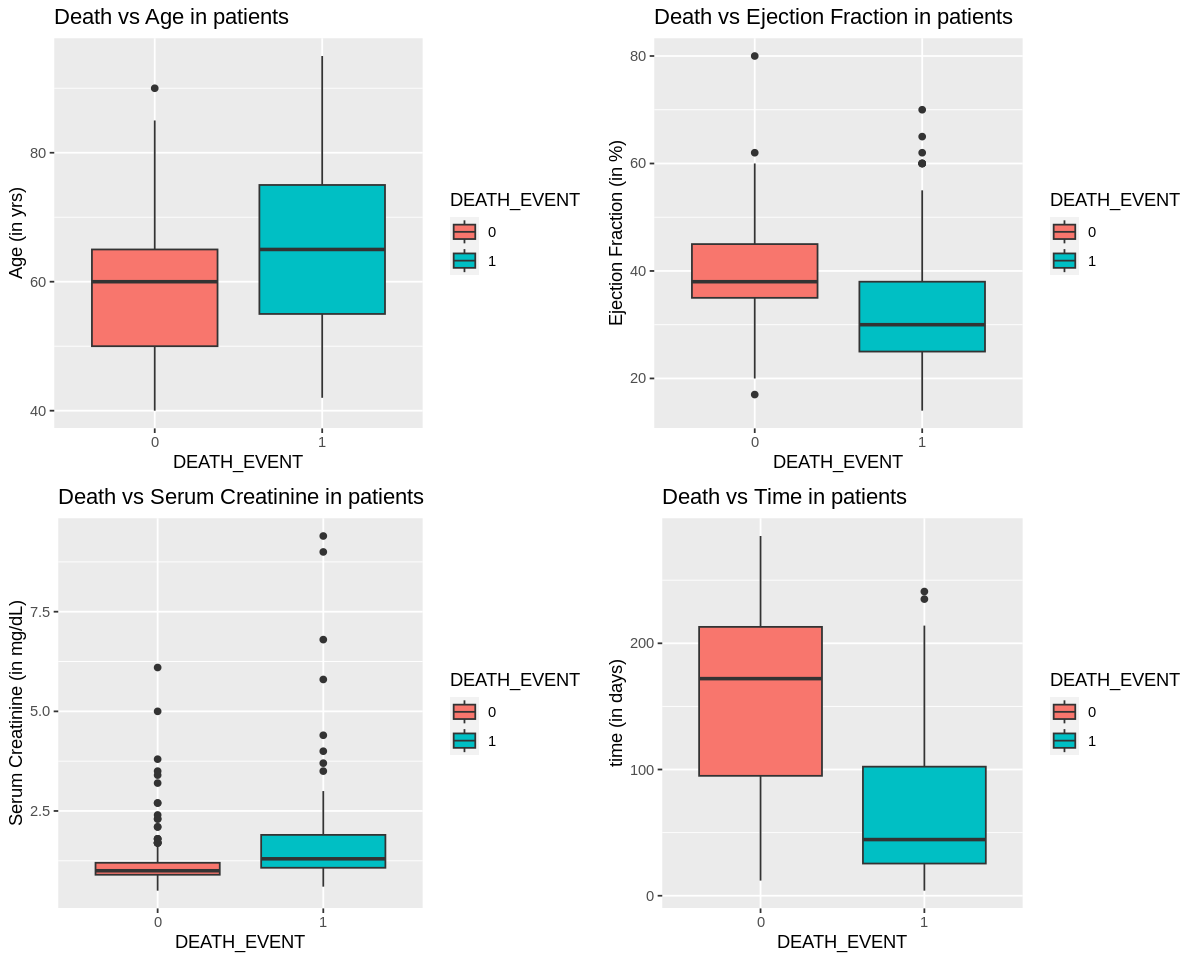

In [4]:
options(repr.plot.width=10, repr.plot.height=8)

plot1 <- ggplot(heart_failures, aes(x = DEATH_EVENT, y = age, fill = DEATH_EVENT)) +
  geom_boxplot() +
  labs(x = "DEATH_EVENT", y = "Age (in yrs)", title = "Death vs Age in patients")

plot2 <- ggplot(heart_failures, aes(x = DEATH_EVENT, y = ejection_fraction, fill = DEATH_EVENT)) +
  geom_boxplot() +
  labs(x = "DEATH_EVENT", y = "Ejection Fraction (in %)", title = "Death vs Ejection Fraction in patients")

plot3 <- ggplot(heart_failures, aes(x = DEATH_EVENT, y = serum_creatinine, fill = DEATH_EVENT)) +
  geom_boxplot() +
  labs(x = "DEATH_EVENT", y = "Serum Creatinine (in mg/dL)", title = "Death vs Serum Creatinine in patients")

plot4 <- ggplot(heart_failures, aes(x = DEATH_EVENT, y = time, fill = DEATH_EVENT)) +
  geom_boxplot() +
  labs(x = "DEATH_EVENT", y = "time (in days)", title = "Death vs Time in patients")

# Arrange the plots in a grid
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)

#### Boxplots Reasoning

Looking at the boxplots we can see that:
- Higher age might be associated with higher deaths in patients.
- Lower Ejection fraction levels might be associated with lower deaths in patients.
- Higher Serum Creatinine levels might be associated with higher deaths in patients.
- Higher time (follow-up period days) might be associated with lower deaths in patients.

Note:
- The above interpretations are only visually-based. 
- Further analysis is needed to identify any possible confounding variables that might be causing the disparities noticed above.

## Methods and Plan

### Methods

#### Lasso Logistic Regression
- The dataset has 13 variables that include both categorical and non-categorical variables. We can use Logistic Regresssion that will help us predict the binary response variable along with Lasso regularization that will get rid of irrelevant feautures by shrinking them to zero. Steps:
    - All the categorical variables converted to binary (converting categorical to numerical variables.
    - Standardize the features so they are all on the same scale. This is to ensure that the penalty is applied uniformly to all variables.
    - We need to split the data into cross-validation sets so that we can use the training and testing set to evaluate the model's performance. This step ensures that the model's performance is assessed on unseen data, so that it's generalized.
    - Train a Logistic Lasso regression model. The regularization parameter (λ), controls the strength of the penalty. We can use either go with a default value for λ or tune it using cross-validation.
    - Interpret model's performance and accuracy and analyze the relevant features as being significant.

Note: use set.seed() for getting reproducible results.

### Assumptions

- Each observation in the dataset should be independent of others.
- There should be no high Multicollinearity between the predictor variables.
- Sample size is large enough.
- The explanatory variables are assumed to be exogenous and not influenced by the response variable.
- There are no outliers in the dataset (or they are controlled).
- There is correlation between explanatory variables and response.
- There are no cofounding variables present.

### Limitations

- Any possible interaction terms need further analysis and are need to be added explicilty.
- Data needs to be linearly separable. Logistic Regression needs independent variables that are linearly related to the log odds (log(p/(1-p)).
- If the number of features is greater than the number of observations, Logistic Regression may lead to overfitting. We should not use a high k-fold cross validation.
- Lasso might select features randomly in case of multicollinear data.                                                          

## Implementation of a proposed model

### Splitting into Training and Testing Data

We split the data into training and testing sets so that we can use the training set to build a model and then check it's preformance using the testing set.

In [12]:
set.seed(1234)

heart_failures_train <- 
    heart_failures %>% 
    slice_sample(prop = 0.70)

heart_failures_test <- 
    heart_failures %>% 
    anti_join(heart_failures_train, by = "ID")

heart_failures_train <- 
    heart_failures_train %>% 
    select(-ID)

heart_failures_test <- 
    heart_failures_test %>% 
    select(-ID)

heart_failures_logistic_model <- 
    glm(formula = DEATH_EVENT ~ .,
        data = heart_failures_train,
        family = binomial)

In [13]:
# Creating model_matrix for X and Y
model_matrix_X_train <- model.matrix(object = heart_failures_logistic_model, data = heart_failures_train)[, -1]

matrix_Y_train <- as.matrix(heart_failures_train$DEATH_EVENT, ncol = 1)

### Model Selection

- We use the training set to cross-validate for the best Lasso lambda that gives us the lowest error.

In [14]:
set.seed(1234)

heart_failures_cv_lambda_LASSO <- 
  cv.glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = "binomial",
  type.measure = "auc",
  nfolds = 5)

heart_failures_cv_lambda_LASSO


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 5, alpha = 1, family = "binomial") 

Measure: AUC 

     Lambda Index Measure      SE Nonzero
min 0.01669    29  0.8693 0.01787       8
1se 0.06740    14  0.8520 0.01598       4

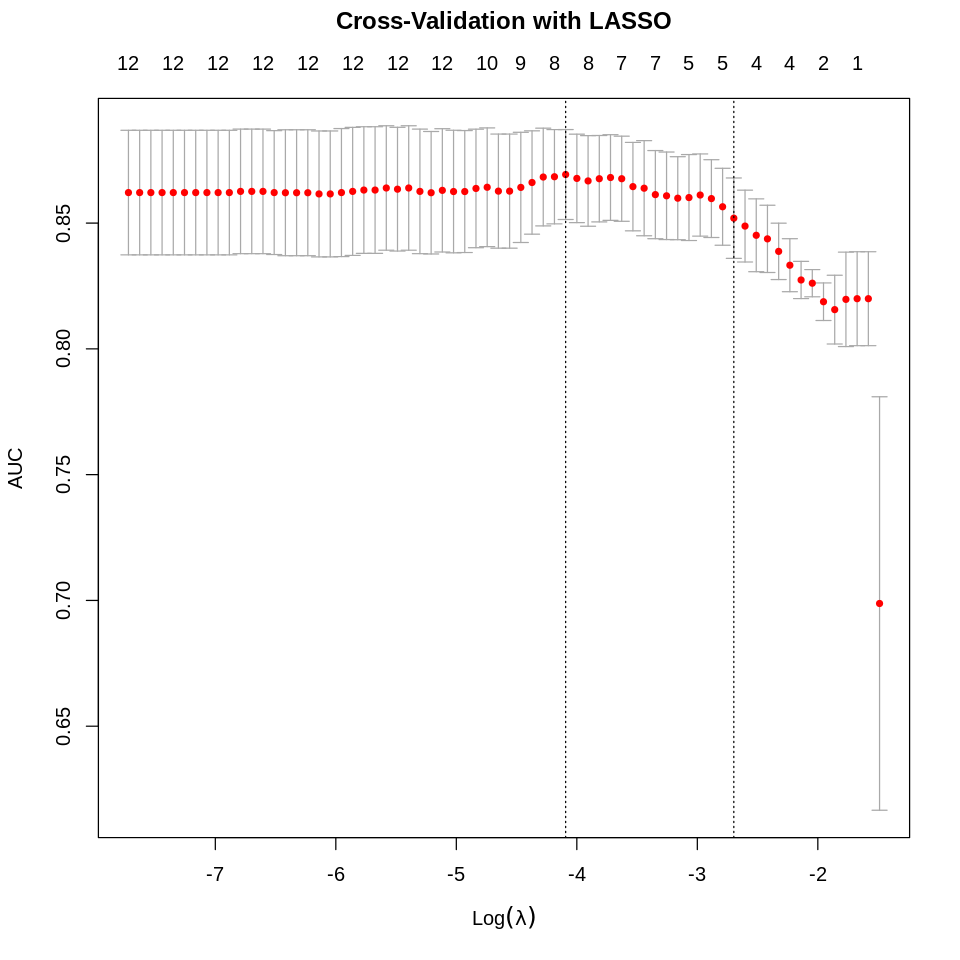

In [17]:
# Adjust these numbers so the plot looks good in your computer.
options(repr.plot.width = 8, repr.plot.height = 8) 

# your code here
plot(heart_failures_cv_lambda_LASSO, main = "Cross-Validation with LASSO\n\n")

In [18]:
# your code here
heart_failures_lambda_1se_AUC_LASSO <- round(heart_failures_cv_lambda_LASSO$lambda.1se, 4)

heart_failures_lambda_1se_AUC_LASSO

[1] 0.0674

In [20]:
# your code here
heart_failures_LASSO_1se_AUC <- glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = "binomial",
  lambda = heart_failures_lambda_1se_AUC_LASSO
)

heart_failures_LASSO_1se_AUC
coef(heart_failures_LASSO_1se_AUC)


Call:  glmnet(x = model_matrix_X_train, y = matrix_Y_train, family = "binomial",      alpha = 1, lambda = heart_failures_lambda_1se_AUC_LASSO) 

  Df  %Dev Lambda
1  4 31.17 0.0674

13 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)               8.47562440
age                       .         
anaemia1                  .         
creatinine_phosphokinase  .         
diabetes1                 .         
ejection_fraction        -0.03046121
high_blood_pressure1      .         
platelets                 .         
serum_creatinine          0.25695032
serum_sodium             -0.05335900
sex1                      .         
smoking1                  .         
time                     -0.00962316

We see that the Lambda with lowest cross-validation error selected model with variables:  
- ejection_fraction
- serum_creatinine
- serum_sodium
- time

**Looking back at our visualizations from earlier:** We can see that the all variables (except serum_sodium) selected our the ones we observed a visual significance earlier.

In [26]:
model_matrix_X_test <- model.matrix(object = heart_failures_logistic_model, data = heart_failures_test)[, -1]

matrix_Y_test <- as.matrix(heart_failures_test$DEATH_EVENT, ncol = 1)

ROC_lasso <- 
    roc(
        response = heart_failures_test$DEATH_EVENT,
        predictor = predict(heart_failures_LASSO_1se_AUC,
                     newx = model_matrix_X_test)[,"s0"])

Setting levels: control = 0, case = 1

Setting direction: controls < cases



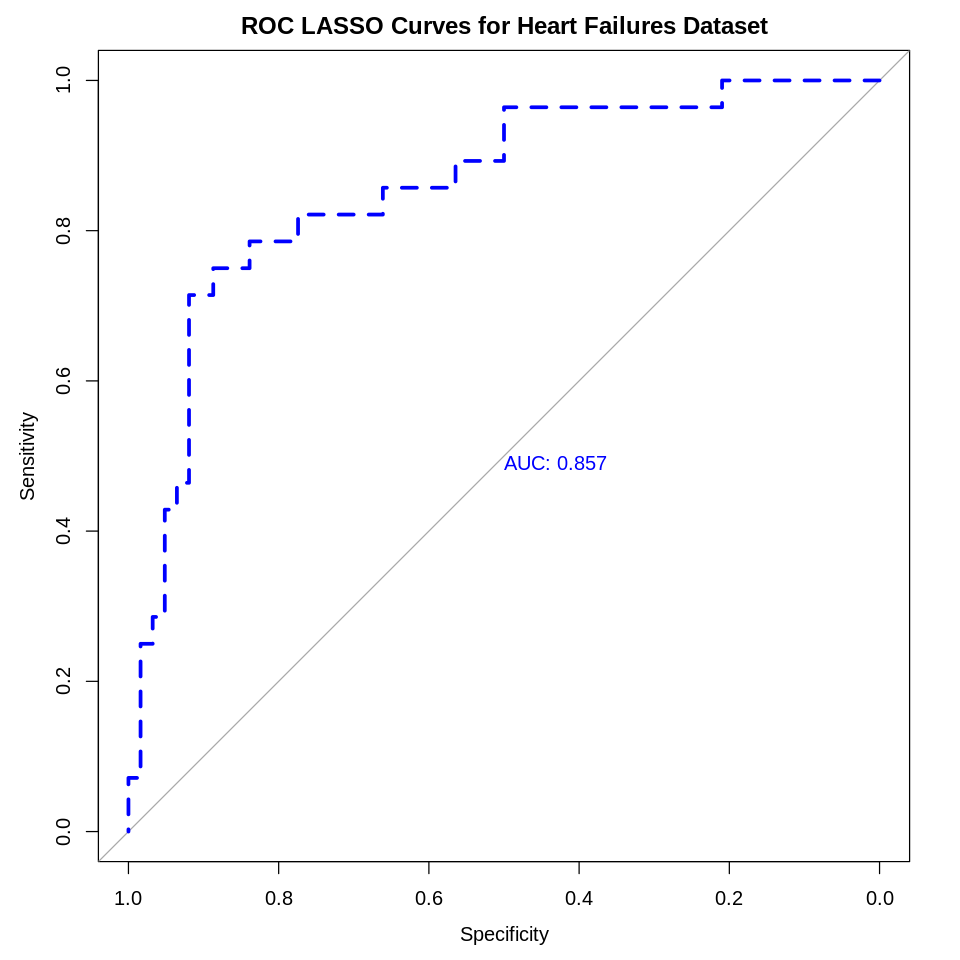

In [27]:
# your code here
plot(ROC_lasso,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC LASSO Curves for Heart Failures Dataset"
)

### Inference

Fitting the model with selected variables on testing set to look at significance of the variables.

In [41]:
# Final model with variables lambda.min
logistic_model <- 
    glm(DEATH_EVENT ~ ejection_fraction + serum_creatinine + serum_sodium + time, data = heart_failures_test, family = binomial)

log_model_results <- 
  tidy(logistic_model) 

log_model_odds_results <- 
  tidy(logistic_model, exponentiate = TRUE) %>%
  mutate_if(is.numeric, round, 6)

log_model_results
log_model_odds_results

term              estimate    std.error    statistic  p.value     
1 (Intercept)       -5.83771675 10.831470608 -0.5389588 5.899153e-01
2 ejection_fraction -0.03997598  0.029564154 -1.3521775 1.763186e-01
3 serum_creatinine   0.46429705  0.329990846  1.4069998 1.594275e-01
4 serum_sodium       0.06593057  0.078378248  0.8411845 4.002446e-01
5 time              -0.03144560  0.007530333 -4.1758576 2.968655e-05

term              estimate std.error statistic p.value 
1 (Intercept)       0.002915 10.831471 -0.538959 0.589915
2 ejection_fraction 0.960813  0.029564 -1.352177 0.176319
3 serum_creatinine  1.590895  0.329991  1.407000 0.159427
4 serum_sodium      1.068153  0.078378  0.841184 0.400245
5 time              0.969044  0.007530 -4.175858 0.000030

- We can see that the most of the variables are deemed insignificant in the results above. 
- We cannot remove the insignificant variables at this stage because it would mean that we our using data to find significant variables. 
- We won't be able to fully trust the inference values in re-fitted model.

### Prediction

We use the test set to predict and obtain a confusion matrix to interpret our results.

In [36]:
p_0 <- 0.857

threshold <- 
  as.integer(predict(heart_failures_LASSO_1se_AUC, newx = as.matrix(heart_failures_test %>% select(-DEATH_EVENT)), type = "response") > p_0)

confusion_matrix <- 
    confusionMatrix(
    data = as.factor(threshold),
    reference = as.factor(heart_failures_test$DEATH_EVENT),
    positive = "1"
)

confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 62 27
         1  0  1
                                          
               Accuracy : 0.7             
                 95% CI : (0.5943, 0.7921)
    No Information Rate : 0.6889          
    P-Value [Acc > NIR] : 0.4604          
                                          
                  Kappa : 0.0486          
                                          
 Mcnemar's Test P-Value : 5.624e-07       
                                          
            Sensitivity : 0.03571         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.69663         
             Prevalence : 0.31111         
         Detection Rate : 0.01111         
   Detection Prevalence : 0.01111         
      Balanced Accuracy : 0.51786         
                                          
       'Positive' Class : 1               
                                    

### Results

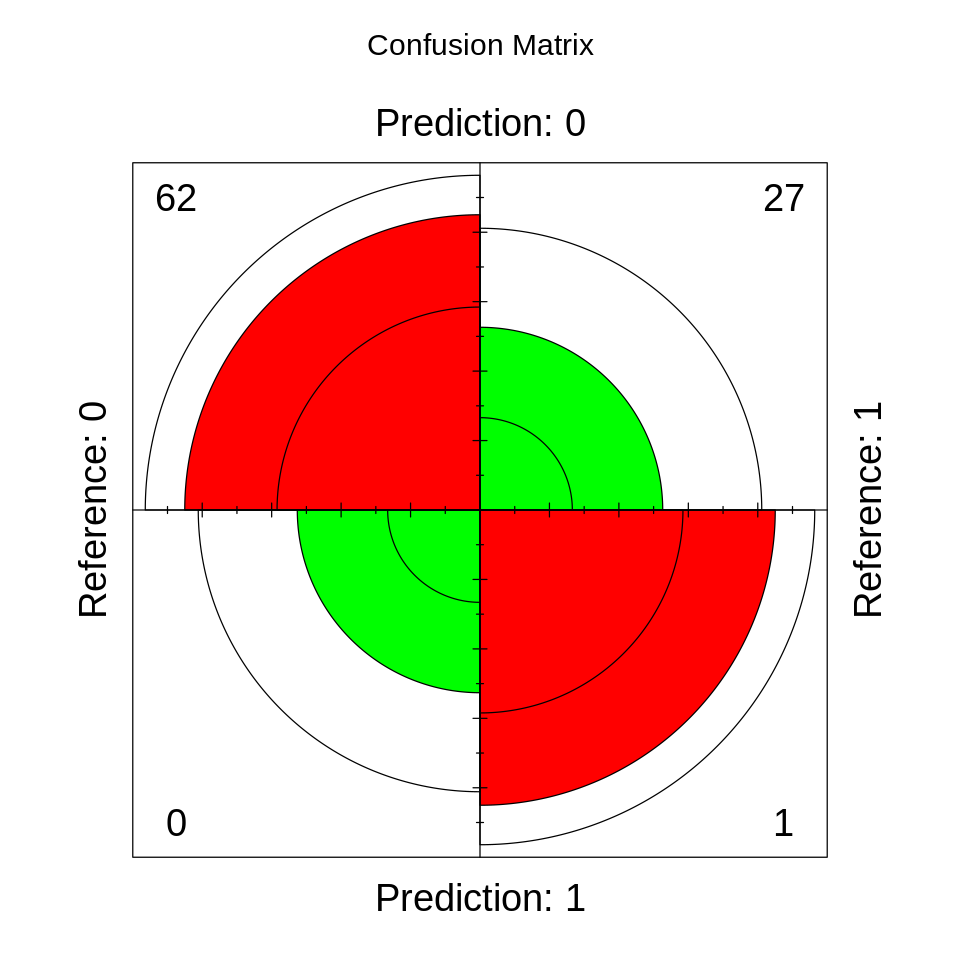

In [37]:
# Visualizing Confusion Matrix
fourfoldplot(as.table(confusion_matrix$table),color=c("green","red"),main = "Confusion Matrix")

- We can see that the model has a accuracy of 85% with Sensitivity : 0.7 and Specificity : 0.9322
- The model's ability to correctly identify positive instances is 70%.
- A specificity of 0.9322 indicates that the model is correctly identifying most negative instances.

**Potential Problems**:
- The inference suggests that the variables are not related with the response significantly but we obtained good prediction results. Further analysis is need to see whether lasso is the best approach for selecting variables in this case.
- One other reason for problematic inference might be related to class imbalance for response variable and insufficent data size. Because our total data size is 299, doing cross validation might make the folds not completely representative of the whole data. 